In [1]:
%pylab inline
import yt

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /project/projectdirs/astro250/doris/halo/yt-dark/

/global/project/projectdirs/astro250/doris/halo/yt-dark


In [3]:
cd darksky_catalog/

/global/project/projectdirs/astro250/doris/halo/yt-dark/darksky_catalog


In [4]:
yt.funcs.mylog.setLevel(50) #coerce output null

In [5]:
import yt
import numpy as np
# from enhance import enhance
from numpy import float64
#I added an empty __init__.py so that the modules can detect what's inside the darksky/ directory
# from darksky_tour.enhance import enhance
from yt.utilities.lib.image_utilities import add_rgba_points_to_image
from darksky_catalog import darksky

# Define a bounding box of 100 Mpc on a side.
center = np.array([-2505805.31114929,  -3517306.7572399, -1639170.70554688])
width = 50.0e3 # 5 Mpc
bbox = np.array([center-width/2, center+width/2])
ds = darksky['ds14_a']#['halos_a'].load(bounding_box = "None", midx = 7)
print ds.datasets
halo = darksky['ds14_a']['halos_a_1.0000'].load(bounding_box = "None", midx = 7)
type(halo)

[DarkSkySDFHaloCatalog: halos_a_1.0000, DarkSkySDFFullOutput: full_data_a_1.0000, DarkSkyFilteredHaloCatalog: filtered_1e15_a_1.0000]


yt.frontends.sdf.data_structures.SDFDataset

DarkSkyCatalog class is [here](https://bitbucket.org/darkskysims/darksky_catalog/src/6fb48092c044143f9ffad34040892d64cb33029e/darksky_catalog/catalog.py?at=default&fileviewer=file-view-default)

In [50]:
darksky['ds14_a'].datasets

[DarkSkySDFHaloCatalog: halos_a_1.0000,
 DarkSkySDFFullOutput: full_data_a_1.0000,
 DarkSkyFilteredHaloCatalog: filtered_1e15_a_1.0000]

In [34]:
print halo.fluid_types
print halo.domain_center
print halo.domain_dimensions

('gas', 'deposit', 'index')
[ 4000.  4000.  4000.] code_length
[2 2 2]


In [6]:
type(darksky['ds14_a']['halos_a_1.0000'])

darksky_catalog.dataset.DarkSkySDFHaloCatalog

In [7]:
type(darksky['ds14_a']['filtered_1e15_a_1.0000'])

darksky_catalog.dataset.DarkSkyFilteredHaloCatalog

In [8]:
filtered_catalog =darksky['ds14_a']['filtered_1e15_a_1.0000']

In [9]:
filtered_catalog.halo_catalog

'halos_a_1.0000'

In [10]:
# halo.index[4] #don't do this , will crash notebook

In [11]:
filtered_catalog.dataset_type

'filtered_halo_catalog'

In [12]:
filtered_catalog._attrs

('filter_desc', 'halo_catalog', 'name', 'url', 'authors', 'uuid')

In [14]:
filtered_catalog.get_halo(3)

(2573.74609375, 4400.4296875, 2438.5810546875, 170.69931030273438, -178.6830596923828, -269.6794738769531, 5967416286773248.0, 7118018161147904.0, 4287023217115136.0, 2829745376985088.0, 859232098320384.0, 2682.095947265625, 1804.38330078125, 4.698720455169678, 0.024555811658501625, 0.6881513595581055, 22578031121, -1)

In [15]:
ds = filtered_catalog.load()

<SDFRead Object> file: http://darksky.slac.stanford.edu/simulations/ds14_a/halos/ds14_a_halos_filter_1e15_1.0000
parameters: 
	header_offset: 106
	byteorder: 0x78563412
arrays: 
	m200b[136592]
	id[136592]


In [34]:
filtered_catalog.get_halo(136591)

(2726.94287109375, 3072.8818359375, 641.2564697265625, -68.32164764404297, 105.40631103515625, 122.46353912353516, 927564558237696.0, 1000036024451072.0, 826901060911104.0, 647010919120896.0, 135844958568448.0, 1645.4683837890625, 971.8765869140625, 2.442671775817871, 0.045493233948946, 0.7754606604576111, 3573634164, -1)

Code inside [dataset.py](https://bitbucket.org/darkskysims/darksky_catalog/src/6fb48092c044143f9ffad34040892d64cb33029e/darksky_catalog/dataset.py?at=default&fileviewer=file-view-default)

In [22]:
def get_halo(self, n):
        ds = self.load()
        offset = ds['id'][n]
        catalog = self.parent[self.halo_catalog].load(midx = -1)
#         return catalog
        return  catalog.sdf_container.structs
#         halo = catalog.sdf_container.structs[-1][offset][0]
#         return halo

In [25]:
get_halo(filtered_catalog,4)

##### Properties of the halo info

In [30]:
get_halo(filtered_catalog,4)[-1][10]

array([ (13.368721008300781, 3.1736860275268555, 7.173592567443848, 83.88713836669922, -115.49732208251953, -169.82952880859375, 663801167872.0, 780942573568.0, 468565557248.0, 390471286784.0, 0.0, 139.84893798828125, 85.87332153320312, 0.22493979334831238, 0.08961829543113708, 0.7047524452209473, 3, -1)], 
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('vx', '<f4'), ('vy', '<f4'), ('vz', '<f4'), ('mvir', '<f4'), ('m200b', '<f4'), ('m200c', '<f4'), ('m500c', '<f4'), ('m2500c', '<f4'), ('vmax', '<f4'), ('rvmax', '<f4'), ('r200b', '<f4'), ('spin', '<f4'), ('kin_to_pot', '<f4'), ('id', '<i8'), ('pid', '<i8')])

the halo catalog just groups together a group of paarticles that lies within the halo ,and also contain info about the halo 

In [35]:
# physical_quantity="density"
# slc = yt.SlicePlot(hd, "z",physical_quantity ,window_size=7)
# slc.set_axes_unit('pc')
# slc.set_cmap(physical_quantity,"rainbow")
# slc.show()

Examples from [here ](http://darksky.slac.stanford.edu/scivis2015/examples.html)


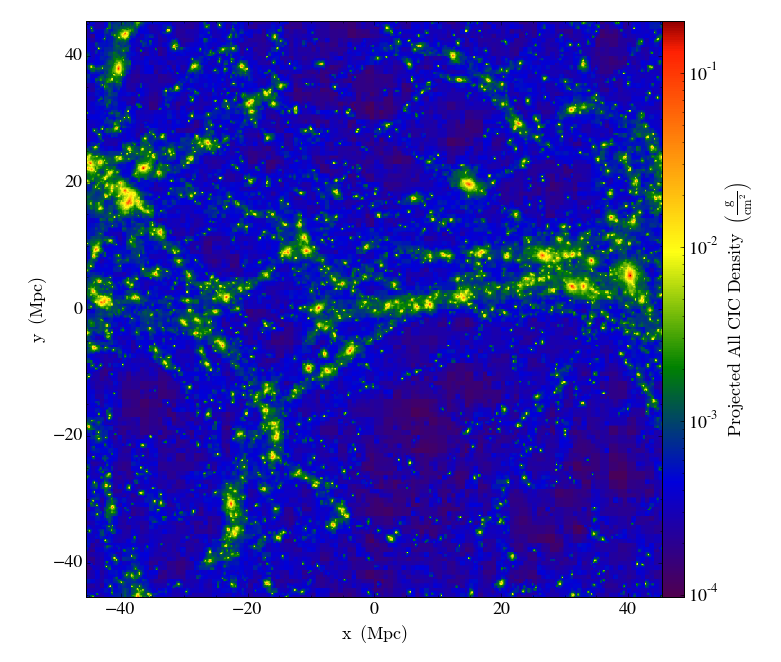

In [22]:
prefix = "http://darksky.slac.stanford.edu/scivis2015/data/ds14_scivis_0128/"
ds = yt.load(prefix+"ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()
proj = yt.ProjectionPlot(ds, 'z', ('deposit','all_cic'))
proj.show()